In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from keras import losses
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\Acer\AppData\Local\Temp\ipykernel_19252\2550107631.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def moving_average(data, window_size):
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

In [3]:
training_data_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/Training dan Testing/Gabungan_Training_Data_40 C_Turnigy.csv'
training_data = pd.read_csv(training_data_path)
testing_data_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/Training dan Testing/Testing_US06_40 Deg.csv'
testing_data = pd.read_csv(testing_data_path)

In [4]:
X_train = training_data[['Voltage', 'Current', 'Temperature']]
y_train = training_data['SOC'] / 100  
X_test = testing_data[['Voltage', 'Current', 'Temperature']]
y_test = testing_data['SOC'] / 100  

In [5]:
timesteps = 20
X_train_reshaped = np.array([X_train[i:i+timesteps].values for i in range(len(X_train) - timesteps)])
X_test_reshaped = np.array([X_test[i:i+timesteps].values for i in range(len(X_test) - timesteps)])
y_train_reshaped = y_train[timesteps:]
y_test_reshaped = y_test[timesteps:]

In [12]:
model = Sequential([
    LSTM(units=32, activation='tanh', return_sequences=True, input_shape=(timesteps, X_train.shape[1])),
    LSTM(units=32, activation='tanh', return_sequences=False),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=200, 
                    batch_size=64, validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 0.0135 - val_loss: 5.9347e-04
Epoch 2/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 4.7720e-04 - val_loss: 6.1060e-04
Epoch 3/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - loss: 3.3386e-04 - val_loss: 5.0571e-04
Epoch 4/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 3.8498e-04 - val_loss: 3.7593e-04
Epoch 5/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 51s 44ms/step - loss: 3.6040e-04 - val_loss: 3.8602e-04
Epoch 6/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - loss: 2.7535e-04 - val_loss: 4.9129e-04
Epoch 7/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 49s 42ms/step - loss: 2.6721e-04 - val_loss: 3.2261e-04
Epoch 8/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - loss: 2.0487e-04 - val_loss: 2.7082e-04
Epoch 9/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - loss: 2.8502e-04 - val_loss: 4.3693e-04
Epoch 10/200
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - loss: 1.9030e-04 - val_loss: 3.1900e-04
Epoch 11/200


In [14]:
model.summary()
model.save('C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/hasil model/skripsi2_polimer_40_US06_tanpa_grid_search.h5')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 32)         │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,885 (151.90 KB)

 Trainable params: 12,961 (50.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,924 (101.27 KB)

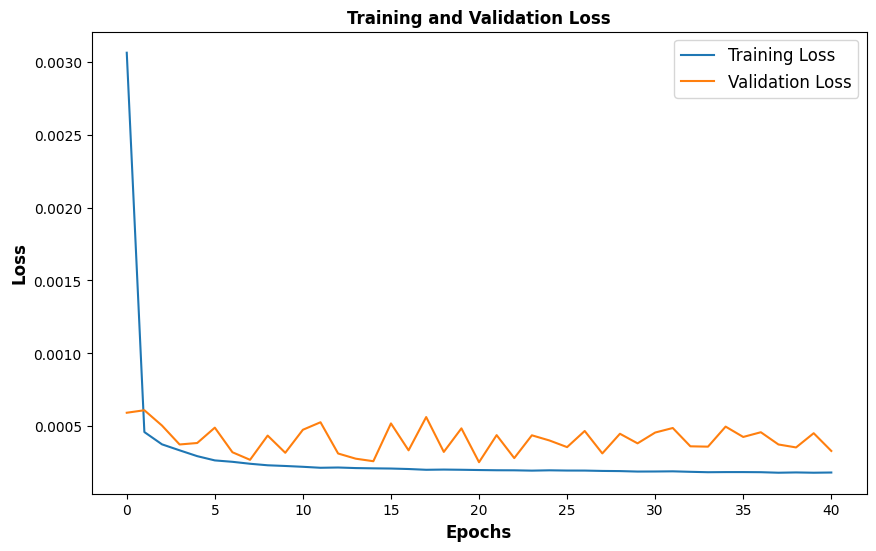

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss', fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12})
plt.show()

195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3858e-04
Loss Pengujian: 0.0002898561942856759
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


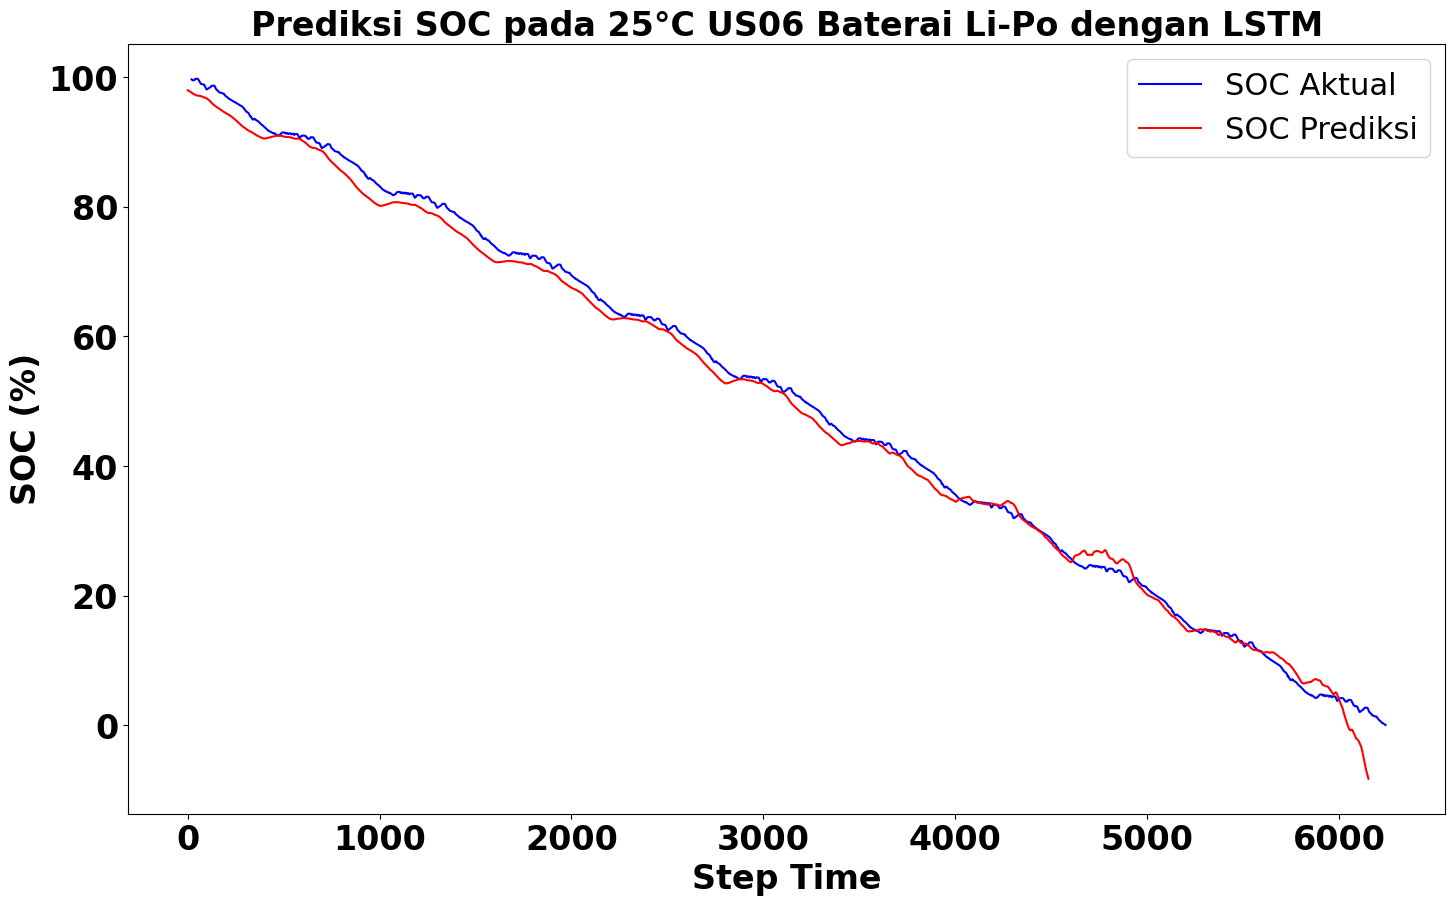

Metrik Evaluasi dalam Persen:
Mean Absolute Error (MAE): 2.0478%
Root Mean Squared Error (RMSE): 2.9146%
R-squared: 99.7344%


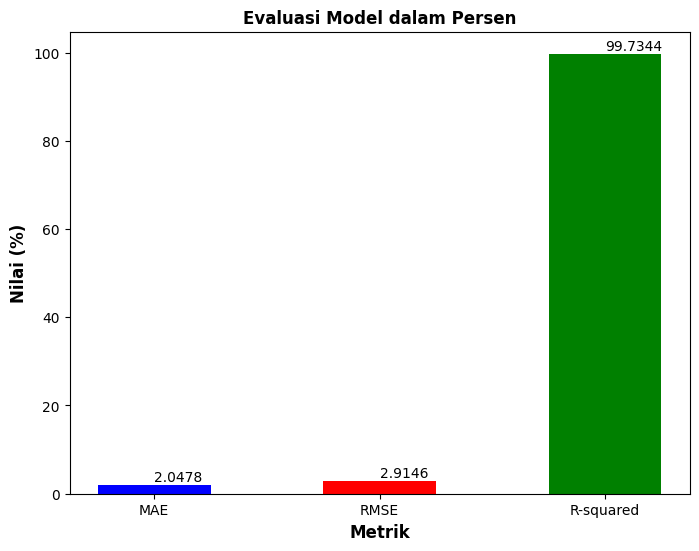

In [ ]:
loaded_model = load_model('C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Turnigy lithium polimer/hasil model/skripsi2_polimer_40_US06_tanpa_grid_search.h5', custom_objects={'mse': losses.mean_squared_error})

loss = loaded_model.evaluate(X_test_reshaped, y_test_reshaped)
print(f'Loss Pengujian: {loss}')

y_pred = loaded_model.predict(X_test_reshaped)

window_size = 70
y_pred_smoothed = moving_average(y_pred, window_size)

mae_smoothed = mean_absolute_error(y_test_reshaped[window_size - 1:], y_pred_smoothed)
rmse_smoothed = mean_squared_error(y_test_reshaped[window_size - 1:], y_pred_smoothed, squared=False)
r2_smoothed = r2_score(y_test_reshaped[window_size - 1:], y_pred_smoothed)

y_test_reshaped_percent = y_test_reshaped * 100

# Plot SOC prediction
plt.figure(figsize=(17, 10))
plt.title('Prediksi SOC pada 25°C US06 Baterai Li-Po dengan LSTM', fontsize=24, fontweight='bold')
plt.plot(y_test_reshaped_percent, label='SOC Aktual', color='blue', linestyle='-')
plt.plot(y_pred_smoothed * 100, label='SOC Prediksi', color='red', linestyle='-')
plt.xlabel('Step Time', fontsize=24, fontweight='bold')
plt.ylabel('SOC (%)', fontsize=24, fontweight='bold')
plt.legend(prop={'size': 22})  
plt.xticks(fontsize=24, fontweight='bold')  
plt.yticks(fontsize=24, fontweight='bold')  
plt.show()

mae_percent = (mae_smoothed / y_test_reshaped.mean()) * 100
rmse_percent = (rmse_smoothed / y_test_reshaped.mean()) * 100
r2_percent = r2_smoothed * 100  

print("Metrik Evaluasi dalam Persen:")
print(f"Mean Absolute Error (MAE): {mae_percent:.4f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percent:.4f}%")
print(f"R-squared: {r2_percent:.4f}%")

plt.figure(figsize=(8, 6))  
bars = plt.bar(['MAE', 'RMSE', 'R-squared'], [mae_percent, rmse_percent, r2_percent], color=['blue', 'red', 'green'], width=0.5)
plt.title('Evaluasi Model dalam Persen', fontweight='bold')
plt.xlabel('Metrik', fontsize=12, fontweight='bold')
plt.ylabel('Nilai (%)', fontsize=12, fontweight='bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom')

plt.show()